In [157]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time
from matplotlib.animation import FuncAnimation

In [141]:
cells = [' ', '*']

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,


def randomGrid(N, probabilty=0.1):
    """creates a grid of NxN with random cells"""

    probabilty = 1-probabilty
    A=np.random.rand(N,N)
    A[A > probabilty] = 1
    A[A <= probabilty] = 0

    return A

def life_step(grid, N):

        newGrid = grid.copy()
        for i in range(0,N):
            for j in range(0,N):

                # compute neighbor sum
                #neigh = int((grid[i, (j - 1) % N] + grid[i, (j + 1) % N] +
                #             grid[(i - 1) % N, j] + grid[(i + 1) % N, j] +
                #             grid[(i - 1) % N, (j - 1) % N] + grid[(i - 1) % N, (j + 1) % N] +
                #             grid[(i + 1) % N, (j - 1) % N] + grid[(i + 1) % N, (j + 1) % N]) / 255)

                a1 = i - 1
                if a1 < 0:
                    a1 = 0
                a2 = a1 + 3
                if a2 > N:
                    a2 = N
                b1 = j - 1
                if b1 < 0:
                    b1 = 0
                b2 = b1 + 3
                if b2 > N:
                    b2 = N
                
                g = grid[a1:a2, b1:b2]
                neigh = sum(sum(g))
                # Conway's rules for current timestep
                if grid[i, j] == 1:
                    if (neigh < 2) or (neigh > 3):
                        newGrid[i, j] = 0
                else:
                    if neigh == 3:
                        newGrid[i, j] = 1

        return newGrid


Generations 217 individuals 278.0


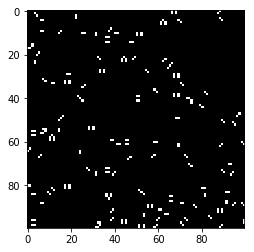

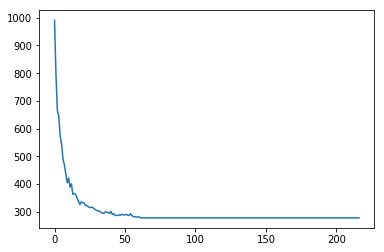

KeyboardInterrupt: 

In [162]:
# set grid size
N = 100

updateInterval = 0.5

grid = randomGrid(N, 0.10)

# set up animation
fig, ax = plt.subplots()
running = True
img = ax.imshow(grid, interpolation='nearest', cmap="gray")

i = 0
evolution = []
while running:

    p = sum(sum(grid))
    clear_output()
    print("Generations", i, "individuals", p)
    grid = life_step(grid, N)
    #draw_grid(0,0,grid)
    
    #anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
    plt.imshow(grid, interpolation='nearest', cmap="gray")
    plt.show()
    plt.plot(evolution)
    plt.show()
    time.sleep(updateInterval)

    if i == 1000 or p <= 0:
        break
    i+=1
    evolution.append(p)

In [ ]:
plt.plot(evolution)

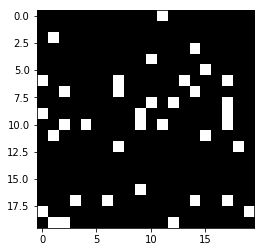

In [128]:
grid = randomGrid(N, 0.10)
plt.imshow(grid, interpolation='nearest', cmap="gray")
plt.show()